In [2]:
import os 
import numpy as np
import pandas as pd
import zipfile
#import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
os.getcwd()

'/content'

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
zf = zipfile.ZipFile('/content/gdrive/MyDrive/fashion-mnist_train.csv.zip') 
df = pd.read_csv(zf.open('fashion-mnist_train.csv'))
#df.head()
df_train=df.copy()
df_train.shape

(60000, 785)

In [5]:
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.label.value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

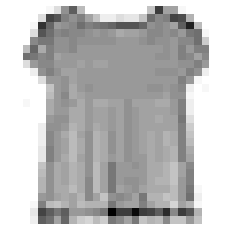

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_obj=df_train.iloc[22000,1:] 
# Since the first column in the dataframe contains the label that column is omitted in the iloc selection.
some_obj_arr = some_obj.values
some_obj_image = some_obj_arr.reshape(28, 28)
plt.imshow(some_obj_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y = df_train['label']
X = df_train.drop('label',axis='columns')
X.shape

(60000, 784)

In [9]:
y.shape

(60000,)

In [10]:
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)
type(y_cat)

numpy.ndarray

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size=0.1)

In [87]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [12]:
# from tensorflow.keras.utils import to_categorical
# y_train_cat = to_categorical(y_train)
# type(y_train_cat)

In [13]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train_1D, y_test_1D = train_test_split(X,y,test_size=0.2,shuffle=True)

In [14]:
# y_train_1D.shape

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_255=X_train/255
X_train_255.head(5)
X_test_255=X_test/255
# X_train_255.head(5)

In [70]:
# X_test_255_df = pd.DataFrame(X_train_255, columns=X_train.columns)
# X_train_255_df=pd.DataFrame(X_test_255, columns=X_test.columns)


In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [64]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Activation, Flatten, Conv2D,MaxPool2D,Dropout,MaxPooling2D
EP=100

In [19]:
# y_train.shape
y_train_df=pd.DataFrame(y_train)
# y_train_df.head(10)

In [20]:
# y_train_cat_df=pd.DataFrame(y_train_cat)

In [21]:
X_train_scaled.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.694118,0.309804,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,0.007874,0.0,...,0.003922,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.364706,0.67451,0.207843,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
# Sequential model using scaled data 
model=keras.Sequential([
        layers.Flatten(input_shape=(784,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_df,validation_split=0.1,batch_size=100, epochs=3,shuffle=True)

Epoch 1/3
432/432 [==============================] - 4s 3ms/step - loss: 0.6876 - accuracy: 0.7448 - val_loss: 0.4929 - val_accuracy: 0.8181
Epoch 2/3
432/432 [==============================] - 1s 3ms/step - loss: 0.5494 - accuracy: 0.8006 - val_loss: 0.4500 - val_accuracy: 0.8373
Epoch 3/3
432/432 [==============================] - 1s 3ms/step - loss: 0.5149 - accuracy: 0.8147 - val_loss: 0.4186 - val_accuracy: 0.8492


In [23]:
y_pred=model.predict(X_test_scaled)
y_pred


array([[6.45031150e-07, 9.99983788e-01, 1.84577287e-09, ...,
        9.51501139e-13, 2.54259280e-08, 8.09136959e-12],
       [2.61193048e-03, 1.40348997e-03, 6.85992882e-06, ...,
        4.80569775e-15, 3.17417216e-05, 2.38189690e-09],
       [4.12805730e-06, 9.99881268e-01, 3.15137627e-09, ...,
        1.23986813e-12, 1.66187533e-07, 8.37169847e-11],
       ...,
       [2.12900519e-01, 1.34097375e-02, 9.23579708e-02, ...,
        7.02915804e-06, 6.78412663e-03, 2.97642953e-04],
       [9.17238057e-01, 1.71432134e-07, 2.94703146e-04, ...,
        2.54441080e-21, 5.02833331e-08, 3.65693363e-14],
       [1.51837403e-02, 6.68544963e-05, 8.99642944e-01, ...,
        4.41665315e-10, 2.64966482e-04, 8.93858569e-08]], dtype=float32)

In [24]:
import numpy as np
y_pred_list=[]
for x in y_pred:
  indices = np.where(x == x.max())
  y_pred_list.append(indices[0][0])

print(len(y_pred_list))


12000


In [25]:
type(y_test)

numpy.ndarray

In [102]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [103]:
def find_index(R):
  val=R[R == 1.0].index[0]
  return val

y_test_df['target']= y_test_df.apply(lambda row: find_index(row), axis=1)
y_test_df.head(5)
y_test_df.shape


(6000, 11)

In [104]:
y_test_list=y_test_df['target'].tolist()

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_list, y_pred_list)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.67%


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=350)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca.shape

(48000, 350)

In [31]:
X_train_pca

array([[ 2.41186698e+00, -5.58253406e+00,  1.53728674e+00, ...,
         6.06249993e-02, -1.26317315e-02, -4.05167873e-02],
       [ 3.35001004e+00,  3.44753288e-01, -2.19638310e+00, ...,
        -1.15935035e-02,  3.81042337e-02, -8.76024364e-03],
       [-2.11664291e+00,  5.78155309e+00,  4.20089950e+00, ...,
         1.21957436e-01,  1.08739741e-03,  1.37630105e-02],
       ...,
       [-2.83271680e-01,  1.25519684e+00, -3.43165193e-01, ...,
         5.96496274e-02, -1.43427911e-01,  3.39341904e-02],
       [ 6.04631113e+00,  2.70232926e-01,  4.48856904e-02, ...,
        -8.56139275e-02, -3.21613838e-02,  3.93095446e-02],
       [-6.44175888e+00, -4.98082496e-01, -1.76379973e+00, ...,
        -2.39387152e-02,  6.96712419e-02, -2.29704963e-01]])

In [32]:
X_test_pca = pca.transform(X_test_scaled)
X_test_pca.shape

(12000, 350)

In [33]:
y_train.shape

(48000, 10)

In [34]:

# from xgboost import XGBClassifier
# XGB_model = XGBClassifier(random_state =1)
# # cv = cross_val_score(xgb,X_train_pca,y_train,cv=5)
# # print(cv) 
# # print(cv.mean())

# XGB_model.fit(X_train_pca, y_train_1D)

In [35]:
# y_pred=XGB_model.predict(X_test_pca)

In [36]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test_1D, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [37]:
# Sequential model using pca tranformed data
model=keras.Sequential([
        layers.Flatten(input_shape=(350,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_pca, y_train_df,validation_split=0.1,batch_size=100, epochs=3,shuffle=True)

Epoch 1/3
432/432 [==============================] - 2s 3ms/step - loss: 0.5309 - accuracy: 0.8116 - val_loss: 0.3877 - val_accuracy: 0.8673
Epoch 2/3
432/432 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8551 - val_loss: 0.3718 - val_accuracy: 0.8704
Epoch 3/3
432/432 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8682 - val_loss: 0.3671 - val_accuracy: 0.8704


In [38]:
y_pred=model.predict(X_test_pca)
y_pred

array([[7.59906982e-09, 1.00000000e+00, 2.95212535e-11, ...,
        1.27356179e-15, 6.23604224e-10, 1.63484109e-17],
       [6.14919874e-04, 1.83095945e-05, 1.14083014e-06, ...,
        2.76396100e-10, 4.67724058e-05, 1.60223976e-08],
       [5.42516432e-08, 9.99998808e-01, 9.32852615e-11, ...,
        5.20994482e-14, 9.54962776e-09, 6.56323267e-16],
       ...,
       [1.13849916e-01, 9.49754554e-04, 1.05752107e-02, ...,
        5.07711434e-07, 1.00006703e-02, 3.43015699e-06],
       [9.62294042e-01, 6.06134587e-10, 2.17094248e-06, ...,
        2.55911768e-19, 2.99905745e-09, 1.73145043e-15],
       [1.08122351e-02, 4.59914081e-05, 9.39981878e-01, ...,
        1.43419241e-08, 5.36715728e-04, 3.55564197e-07]], dtype=float32)

In [39]:
import numpy as np
y_pred_list=[]
for x in y_pred:
  indices = np.where(x == x.max())
  y_pred_list.append(indices[0][0])

print(len(y_pred_list))



12000


In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_list, y_pred_list)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.45%


In [41]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [42]:
X_train_scaled.shape

(48000, 784)

In [43]:
X_train_scaled_reshape = X_train_scaled.values.reshape(-1,28,28,1).shape

In [44]:
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.shape

(48000, 350)

In [45]:
# X_train_pcaR = X_train_pca.values.reshape(-1,11,11,1).shape

In [46]:
type(X_train_pca)

pandas.core.frame.DataFrame

In [47]:
X_train_pca.shape

(48000, 350)

In [48]:
# X_train_pca_reshape = X_train_pca.reshape(-1,11,11)

In [49]:
# X_train_pca_reshape

In [50]:
# X_train_pca_reshape.shape

In [51]:
X_train_scaled_reshape = X_train_scaled.values.reshape(-1,28,28,1)

In [89]:
X_test255_reshape=X_test_255.values.reshape(-1,28,28,1)
X_train255_reshape=X_train_255.values.reshape(-1,28,28,1)


In [ ]:
X_train_255

In [52]:
X_train_scaled_reshape.shape

(48000, 28, 28, 1)

In [53]:
y_train.shape

(48000, 10)

In [54]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [55]:
# CNN without dropout layers 
              
model = Sequential()
convolutional = Sequential([
    Conv2D(filters=6, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu', padding='same'), 
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=5, kernel_size=(3, 3), activation='relu',padding='same'), 
    # Conv2D(filters=48, kernel_size=(3, 3), activation='relu',padding='same'),
    Flatten(),
    Dense(units=15, activation='relu'),
    Flatten(),
    Dense(units=10, activation='softmax'),
    ])

convolutional.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

convolutional.fit(X_train_scaled_reshape, y_train,validation_split=0.2,batch_size=50, epochs=3,shuffle=True)

Epoch 1/3
768/768 [==============================] - 11s 4ms/step - loss: 0.4943 - accuracy: 0.8218 - val_loss: 0.3703 - val_accuracy: 0.8689
Epoch 2/3
768/768 [==============================] - 3s 4ms/step - loss: 0.3581 - accuracy: 0.8725 - val_loss: 0.3398 - val_accuracy: 0.8833
Epoch 3/3
768/768 [==============================] - 3s 4ms/step - loss: 0.3248 - accuracy: 0.8842 - val_loss: 0.3840 - val_accuracy: 0.8558


In [56]:
X_test_scaled_reshape = X_test_scaled.values.reshape(-1,28,28,1)

In [57]:
X_test_scaled_reshape.shape

(12000, 28, 28, 1)

In [58]:
y_pred=model.predict(X_test_scaled_reshape)


In [60]:
import numpy as np
y_pred_list=[]
for x in y_pred:
  indices = np.where(x == x.max())
  # print(indices)
  y_pred_list.append(indices[0][0])

print(y_pred_list)


[10, 1, 1, 2, 18, 2, 1, 6, 10, 8, 6, 1, 15, 15, 26, 14, 24, 8, 13, 15, 7, 22, 20, 1, 23, 26, 21, 21, 5, 4, 2, 2, 1, 12, 15, 1, 18, 8, 22, 6, 22, 24, 9, 26, 11, 18, 8, 7, 1, 26, 26, 22, 10, 18, 9, 1, 12, 1, 15, 14, 9, 19, 1, 1, 15, 23, 1, 2, 17, 13, 22, 3, 12, 8, 14, 12, 19, 13, 10, 1, 1, 20, 12, 5, 1, 1, 11, 16, 2, 17, 12, 1, 15, 5, 9, 22, 26, 11, 7, 1, 17, 1, 10, 14, 1, 26, 13, 1, 1, 1, 15, 14, 16, 13, 16, 5, 20, 23, 4, 1, 16, 19, 11, 22, 7, 26, 15, 1, 15, 1, 1, 1, 1, 25, 1, 1, 2, 4, 11, 1, 5, 14, 14, 1, 17, 10, 8, 5, 11, 12, 1, 11, 12, 1, 20, 3, 1, 6, 1, 16, 10, 12, 1, 17, 9, 11, 9, 1, 9, 18, 11, 0, 16, 1, 18, 21, 6, 14, 16, 8, 13, 2, 19, 12, 18, 5, 11, 2, 17, 1, 1, 22, 1, 21, 1, 9, 19, 20, 20, 1, 17, 2, 12, 1, 18, 8, 14, 6, 1, 19, 0, 0, 2, 11, 26, 9, 12, 22, 21, 13, 24, 21, 20, 16, 26, 1, 13, 8, 13, 17, 19, 1, 26, 9, 4, 2, 12, 3, 12, 17, 11, 14, 5, 3, 2, 10, 2, 26, 1, 1, 3, 1, 26, 8, 22, 1, 16, 1, 1, 2, 23, 1, 10, 8, 11, 2, 1, 19, 5, 19, 20, 17, 9, 14, 26, 9, 0, 1, 10, 17, 11, 3, 16

In [61]:
print(y_test_list)

[1, 3, 1, 1, 9, 0, 0, 8, 7, 1, 3, 6, 7, 5, 3, 4, 2, 8, 1, 5, 6, 4, 9, 1, 2, 3, 5, 8, 5, 4, 6, 0, 0, 7, 5, 6, 2, 6, 3, 9, 6, 2, 7, 1, 0, 0, 9, 9, 0, 8, 3, 2, 5, 5, 8, 4, 2, 4, 7, 8, 4, 8, 2, 4, 8, 6, 4, 4, 7, 3, 2, 9, 4, 1, 0, 7, 8, 5, 5, 0, 0, 7, 7, 4, 2, 2, 3, 2, 6, 3, 7, 4, 2, 9, 2, 1, 8, 7, 8, 0, 6, 6, 7, 8, 2, 5, 3, 0, 1, 2, 5, 6, 7, 9, 5, 6, 9, 2, 0, 3, 5, 8, 6, 9, 2, 8, 6, 0, 4, 4, 0, 1, 1, 6, 0, 0, 4, 1, 8, 1, 9, 7, 9, 2, 7, 7, 0, 9, 9, 9, 1, 1, 8, 2, 8, 9, 6, 7, 1, 7, 7, 4, 2, 5, 0, 7, 2, 6, 2, 7, 0, 3, 8, 2, 7, 4, 4, 3, 2, 9, 5, 6, 6, 7, 6, 6, 5, 6, 2, 0, 4, 9, 6, 6, 1, 9, 5, 2, 9, 2, 5, 6, 5, 0, 7, 8, 9, 7, 1, 4, 1, 3, 3, 8, 8, 4, 7, 4, 3, 9, 4, 3, 9, 5, 0, 1, 4, 9, 3, 5, 5, 1, 8, 4, 1, 6, 4, 3, 0, 6, 2, 5, 9, 8, 0, 7, 1, 6, 6, 1, 1, 2, 3, 3, 9, 0, 8, 2, 6, 6, 3, 8, 8, 8, 4, 4, 1, 5, 0, 9, 3, 3, 1, 3, 3, 3, 9, 1, 8, 9, 6, 2, 4, 0, 0, 8, 9, 5, 6, 5, 6, 9, 7, 3, 6, 0, 0, 1, 1, 7, 9, 8, 2, 3, 4, 0, 5, 6, 2, 3, 0, 8, 0, 7, 9, 1, 0, 0, 2, 1, 6, 3, 0, 5, 7, 1, 4, 6, 7, 2, 7, 4, 3, 

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_list, y_pred_list)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 7.08%


In [109]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

model.fit(X_train255_reshape, y_train,validation_split=0,batch_size=64, epochs=30,shuffle=True)

Epoch 1/30
844/844 [==============================] - 113s 4ms/step - loss: 0.4905 - accuracy: 0.8231
Epoch 2/30
844/844 [==============================] - 3s 4ms/step - loss: 0.3237 - accuracy: 0.8834
Epoch 3/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2823 - accuracy: 0.8978
Epoch 4/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2538 - accuracy: 0.9091
Epoch 5/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2339 - accuracy: 0.9143
Epoch 6/30
844/844 [==============================] - 4s 5ms/step - loss: 0.2134 - accuracy: 0.9212
Epoch 7/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1970 - accuracy: 0.9286
Epoch 8/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1845 - accuracy: 0.9325
Epoch 9/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1722 - accuracy: 0.9368
Epoch 10/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1605 - accuracy: 0.94

In [110]:
y_pred=model.predict(X_test255_reshape)

In [111]:
import numpy as np
y_pred_list=[]
for x in y_pred:
  indices = np.where(x == x.max())
  # print(indices)
  y_pred_list.append(indices[0][0])

print(y_pred_list)

[2, 6, 6, 8, 6, 7, 8, 2, 5, 5, 5, 4, 3, 8, 2, 4, 7, 3, 2, 6, 5, 4, 2, 4, 4, 6, 5, 4, 3, 3, 7, 0, 8, 5, 5, 9, 8, 9, 1, 1, 7, 1, 6, 8, 4, 3, 7, 1, 2, 8, 3, 0, 7, 3, 6, 7, 7, 5, 0, 5, 9, 2, 5, 6, 8, 6, 1, 1, 9, 2, 8, 4, 2, 1, 5, 2, 1, 9, 1, 0, 6, 5, 6, 2, 3, 2, 9, 8, 7, 6, 2, 6, 3, 9, 3, 3, 6, 4, 4, 8, 6, 3, 9, 6, 9, 6, 0, 1, 4, 1, 9, 6, 6, 8, 6, 9, 9, 0, 2, 0, 6, 7, 8, 4, 8, 9, 4, 5, 6, 2, 9, 3, 0, 8, 2, 1, 0, 4, 7, 3, 7, 7, 7, 7, 5, 0, 0, 0, 1, 8, 1, 1, 5, 3, 9, 3, 5, 4, 5, 2, 9, 6, 0, 2, 5, 3, 0, 4, 8, 0, 4, 9, 7, 3, 9, 0, 7, 5, 6, 2, 5, 5, 1, 9, 3, 1, 4, 6, 6, 5, 0, 9, 3, 6, 7, 5, 1, 5, 3, 4, 8, 9, 8, 8, 9, 8, 1, 4, 6, 1, 8, 8, 7, 9, 4, 7, 8, 2, 4, 7, 5, 7, 4, 6, 5, 2, 7, 5, 0, 8, 3, 0, 9, 2, 8, 8, 4, 9, 7, 0, 0, 5, 6, 4, 3, 4, 9, 8, 4, 1, 0, 1, 5, 7, 1, 6, 1, 3, 2, 0, 9, 4, 4, 1, 2, 2, 6, 5, 5, 0, 2, 5, 2, 5, 4, 2, 8, 6, 6, 7, 7, 9, 4, 5, 8, 2, 9, 3, 2, 5, 9, 1, 7, 2, 7, 1, 9, 7, 9, 4, 7, 5, 7, 6, 7, 7, 3, 9, 2, 4, 7, 0, 5, 9, 4, 3, 7, 7, 3, 5, 8, 9, 7, 9, 8, 3, 2, 0, 3, 8, 0, 8, 2, 

In [112]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_list, y_pred_list)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.32%
